<h1>Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1.</h1>
Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import numpy as np
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if (type(X) != np.ndarray) or (type(V) != np.ndarray):
        X = np.array(X)
        V = np.array(V)
    return sum(j.dot(i) for i in V for j in X)

print(sum_prod(np.array([[[1,4,1],[1,4,1],[1,4,1]]]),np.array([[[1],[2],[3]],[[1],[2],[3]]])))

[[24]
 [24]
 [24]]


<h1>Задача 2. </h1>
Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
import numpy as np

def binarize(M, threshold=0.5):
    return [[(1 if M[j,i] > threshold else 0) for i in range(len(M[0]))] for j in range(len(M))]

z = binarize(np.array([[1,6,3],[9,6,6],[4,8,1]]),5)

for i in z:
    for j in i:
        print(j, end=" ")
    print("")

0 1 0 
1 1 1 
0 1 0 


<h1>Задача 3.</h1>
Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [27]:
import numpy as np

def unique_rows(mat):
    return [np.unique(i) for i in mat]

def unique_columns(mat):
    return [np.unique(i) for i in mat.T]

def test_unique_rows_and_columns():
    # Тест для unique_rows
    matrix1 = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [1, 2, 3]])
    result = unique_rows(matrix1)
    expected = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([1, 2, 3])]
    assert np.array_equal(result, expected), "Тест 1 (unique_rows) не пройден"

    # Тест для unique_columns
    matrix2 = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [1, 2, 3]])
    result = unique_columns(matrix2)
    expected = [np.array([1, 4]), np.array([2, 5]), np.array([3, 6])]
    assert np.array_equal(result, expected), "Тест 2 (unique_columns) не пройден"

    # Тест для матрицы с одинаковыми элементами
    matrix3 = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]])
    result = unique_rows(matrix3)
    expected = [np.array([1]), np.array([1]), np.array([1])]
    assert np.array_equal(result, expected), "Тест 3 (unique_rows) не пройден"

    # Тест для матрицы с пустыми строками
    matrix4 = np.array([[], [], []])
    result = unique_rows(matrix4)
    expected = [np.array([]), np.array([]), np.array([])]
    assert np.array_equal(result, expected), "Тест 4 (unique_rows) не пройден"

    # Тест для пустой матрицы
    matrix5 = np.array([])
    result = unique_columns(matrix5)
    expected = []
    assert result == expected, "Тест 5 (unique_columns) не пройден"

    print("Все тесты пройдены успешно")

# Запускаем тесты
test_unique_rows_and_columns()

Все тесты пройдены успешно


<h1>Задача 4.</h1>
Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

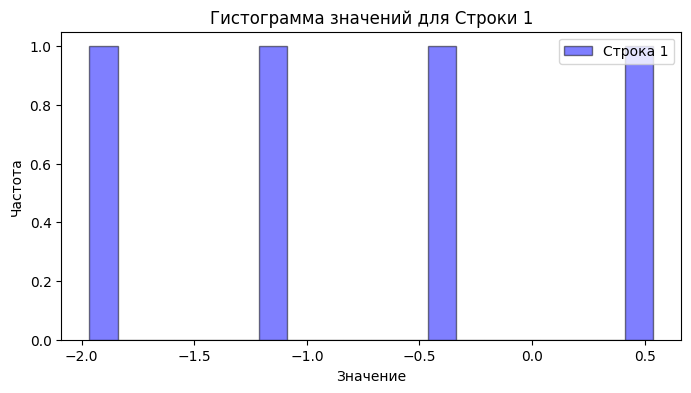

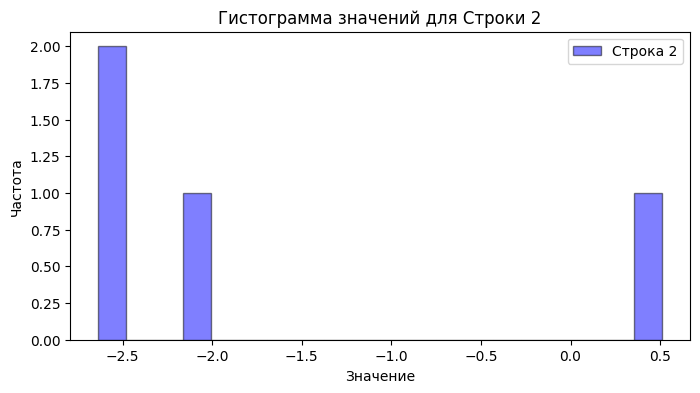

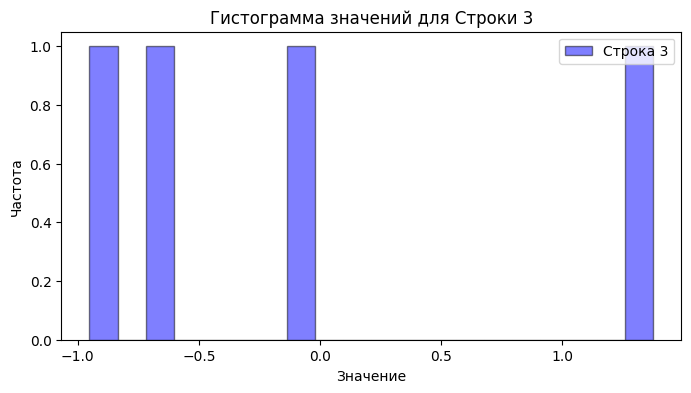

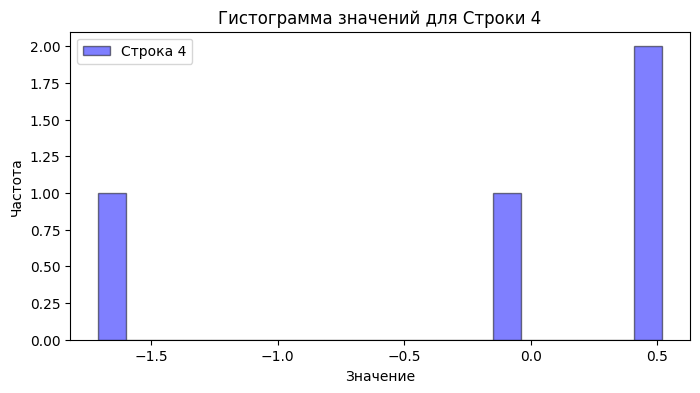

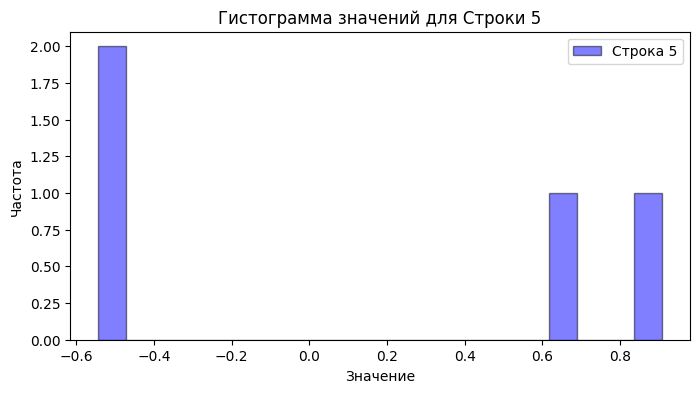

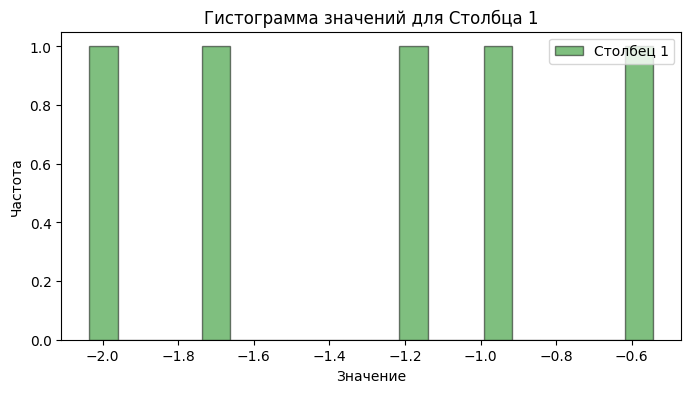

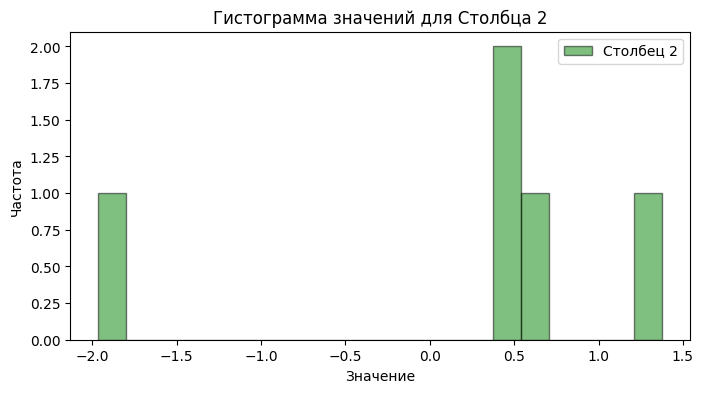

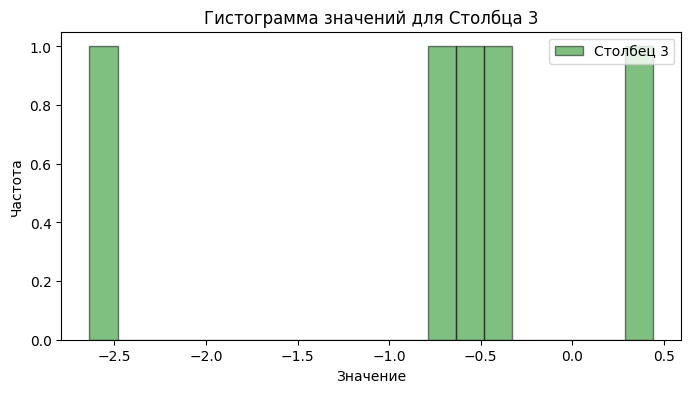

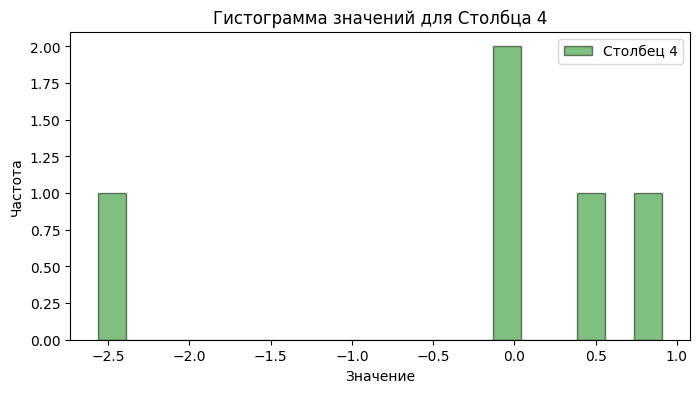

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_analyze_matrix(m, n):
    matrix = np.random.normal(size=(m, n))

    # Вычисление математического ожидания и дисперсии для каждого столбца
    mean_per_column = np.mean(matrix, axis=0)
    variance_per_column = np.var(matrix, axis=0)

    # Вычисление математического ожидания и дисперсии для каждой строки
    mean_per_row = np.mean(matrix, axis=1)
    variance_per_row = np.var(matrix, axis=1)

    # Построение гистограмм для каждой строки
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i], bins=20, alpha=0.5, color='b', edgecolor='k', label=f'Строка {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.legend()
        plt.title(f'Гистограмма значений для Строки {i + 1}')
        plt.show()

    # Построение гистограмм для каждого столбца
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, j], bins=20, alpha=0.5, color='g', edgecolor='k', label=f'Столбец {j + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.legend()
        plt.title(f'Гистограмма значений для Столбца {j + 1}')
        plt.show()

    return mean_per_row, variance_per_row, mean_per_column, variance_per_column

# Пример использования
m = 5  # Количество строк
n = 4  # Количество столбцов
result = generate_and_analyze_matrix(m, n)


<h1>Задача 5.</h1>
Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [35]:
import numpy as np

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            matrix[i][j] = a if (i+j)%2==0 else b
    return matrix

def test_chess():
    # Тест 1: Матрица 3x3 с a=1 и b=0
    result = chess(3, 3, 1, 0)
    expected = np.array([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
    assert np.array_equal(result, expected), "Тест 1 не пройден"

    # Тест 2: Матрица 4x4 с a=5 и b=2
    result = chess(4, 4, 5, 2)
    expected = np.array([[5, 2, 5, 2],
                         [2, 5, 2, 5],
                         [5, 2, 5, 2],
                         [2, 5, 2, 5]])
    assert np.array_equal(result, expected), "Тест 2 не пройден"

    # Тест 3: Матрица 2x2 с a=3 и b=1
    result = chess(2, 2, 3, 1)
    expected = np.array([[3, 1],
                         [1, 3]])
    assert np.array_equal(result, expected), "Тест 3 не пройден"

    # Тест 4: Матрица 1x1 с a=7 и b=4
    result = chess(1, 1, 7, 4)
    expected = np.array([[7]])
    assert np.array_equal(result, expected), "Тест 4 не пройден"

    print("Все тесты пройдены успешно")

# Запускаем тесты
test_chess()

Все тесты пройдены успешно


<h1>Задача 6.</h1>
Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h4>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$</h4>

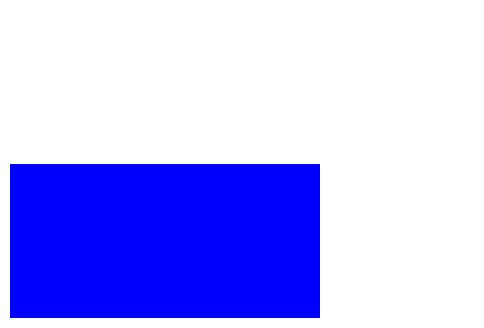

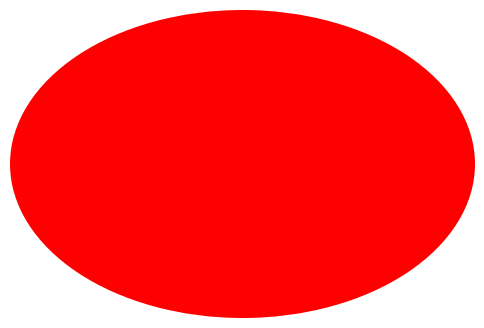

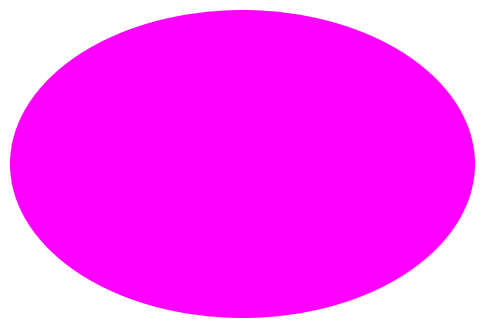

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_rectangle(m, n, a, b, bg_color, rect_color):
    fig, ax = plt.subplots(figsize=(m, n))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Нарисовать фон
    ax.add_patch(patches.Rectangle((0, 0), m, n, facecolor=bg_color))

    # Нарисовать прямоугольник
    rectangle = patches.Rectangle((0, 0), a, b, facecolor=rect_color)
    ax.add_patch(rectangle)

    plt.axis('off')
    plt.show()

def draw_ellipse(m, n, a, b, bg_color, ellipse_color):
    fig, ax = plt.subplots(figsize=(m, n))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Нарисовать фон
    ax.add_patch(patches.Rectangle((0, 0), m, n, facecolor=bg_color))

    # Нарисовать овал
    ellipse = patches.Ellipse((m/2, n/2), 2*a, 2*b, angle=0, facecolor=ellipse_color)
    ax.add_patch(ellipse)

    plt.axis('off')
    plt.show()

# Примеры тестов:
# Рисование прямоугольника с размерами (a, b) на изображении размера (m, n) с заданными цветами
draw_rectangle(6, 4, 4, 2, 'white', 'blue')

# Рисование овала с полуосями (a, b) на изображении размера (m, n) с заданными цветами
draw_ellipse(6, 4, 3, 2, 'white', 'red')

draw_ellipse(6, 4, 3, 2, (1,1,1,1), (1,0,1,1))

<h1>Задача 7.</h1>
 Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h4>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$</h4>

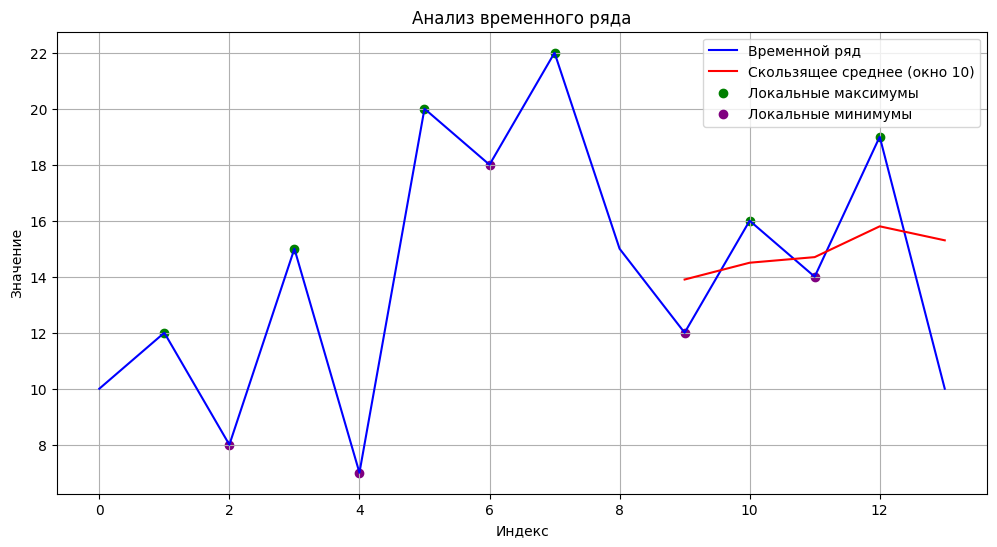

{'Математическое ожидание': 14.142857142857142, 'Дисперсия': 19.408163265306126, 'СКО': 4.4054696986026505, 'Локальные максимумы': [12, 15, 20, 22, 16, 19], 'Локальные минимумы': [8, 7, 18, 12, 14], 'Скользящее среднее': [13.9, 14.5, 14.7, 15.8, 15.3]}


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def analyze_time_series(time_series, window_size=10):
    # Вычисление математического ожидания
    mean = np.mean(time_series)

    # Вычисление дисперсии
    variance = np.var(time_series)

    # Вычисление стандартного отклонения (СКО)
    std_deviation = np.std(time_series)

    # Нахождение локальных максимумов и минимумов
    local_maxima_indices = argrelextrema(np.array(time_series), np.greater)
    local_minima_indices = argrelextrema(np.array(time_series), np.less)
    local_maxima = [time_series[i] for i in local_maxima_indices[0]]
    local_minima = [time_series[i] for i in local_minima_indices[0]]

    # Вычисление скользящего среднего
    moving_avg_series = pd.Series(time_series).rolling(window=window_size).mean()

    # Визуализация временного ряда и скользящего среднего
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Временной ряд', color='blue')
    plt.plot(moving_avg_series, label=f'Скользящее среднее (окно {window_size})', color='red')
    plt.scatter(local_maxima_indices[0], local_maxima, marker='o', color='green', label='Локальные максимумы')
    plt.scatter(local_minima_indices[0], local_minima, marker='o', color='purple', label='Локальные минимумы')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()
    plt.title('Анализ временного ряда')
    plt.grid(True)
    plt.show()

    # Возвращаем результаты анализа
    return {
        'Математическое ожидание': mean,
        'Дисперсия': variance,
        'СКО': std_deviation,
        'Локальные максимумы': local_maxima,
        'Локальные минимумы': local_minima,
        'Скользящее среднее': moving_avg_series[window_size - 1:].tolist()
    }

# Пример использования функции
time_series = [10, 12, 8, 15, 7, 20, 18, 22, 15, 12, 16, 14, 19, 10]
result = analyze_time_series(time_series)
print(result)


<h1> Задача 8.</h1>
Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h4> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]</h4>

In [39]:
import numpy as np

def one_hot_encoding(labels, num_classes=None):
    if num_classes is None:
        num_classes = np.max(labels) + 1

    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    one_hot_matrix[np.arange(len(labels)), labels] = 1

    return one_hot_matrix

# Пример использования:
labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print(one_hot_encoded)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
